# Structure of the notebook

The notebook will be divided into the following sections:

    0. Preparing the data for training the machine learning models
    
    1. Fitting machine learning models on the training data

    2. Applying the learned models to the test data 
    
    3. Suggestions for next steps/improvements.

## Preparing the data for training the machine learning models

Let us perform our modeling with the cleaned dataset we generated from the 'Preliminary-processing' notebook.
 
We are avoiding a manually feature extracted dataset because the logic is that we could be losing important information in the process of doing so.

### Extract the data and load it

In [21]:
# first import all necessary libraries
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [4]:
# Read the cleaned data
df_train = pd.read_csv("train_cleaned.csv")
df_train.head()
df_train.shape


(6045, 24)

In [5]:
# Generating the X and Y (target) matrices from df_train 
y_train = df_train['TARGET_FLAG']
x_train = df_train.drop(['TARGET_FLAG'], axis=1)

# Check shapes 
print(f"The shape of the original dataframe is: {df_train.shape} ")
print(f"The shape of the x dataframe is: {x_train.shape} ")
print(f"The shape of the y dataframe is: {y_train.shape} ")

The shape of the original dataframe is: (6045, 24) 
The shape of the x dataframe is: (6045, 23) 
The shape of the y dataframe is: (6045,) 


In [6]:
x_train.head() # check first few colomns of training X

,PARENT1,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY,...,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,INCOME,HOME_VAL,BLUEBOOK,OLDCLAIM
0,No,z_No,M,PhD,Professional,Private,Minivan,yes,No,Highly Urban/ Urban,...,11.0,14,11,2,3,18.0,67349.0,0.0,14230.0,4461.0
1,No,z_No,M,z_High School,z_Blue Collar,Commercial,Minivan,yes,No,Highly Urban/ Urban,...,11.0,22,1,0,0,1.0,91449.0,257252.0,14940.0,0.0
2,No,Yes,z_F,z_High School,Clerical,Private,z_SUV,no,No,Highly Urban/ Urban,...,10.0,5,4,2,3,10.0,16039.0,124191.0,4010.0,38690.0
3,Yes,z_No,z_F,Bachelors,z_Blue Collar,Commercial,Sports Car,no,No,Highly Urban/ Urban,...,12.0,46,1,0,0,7.0,125301.0,0.0,17430.0,0.0
4,No,z_No,z_F,Bachelors,Clerical,Private,z_SUV,no,No,Highly Urban/ Urban,...,10.0,34,1,0,0,1.0,62978.0,0.0,11200.0,0.0


In [7]:
y_train.head() # check first few colomns of training target Y 

0    0
1    0
2    0
3    1
4    1
Name: TARGET_FLAG, dtype: int64

### Check the distribution of the target


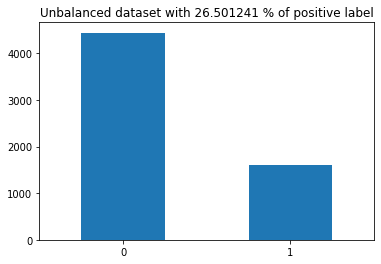

In [93]:
y_train.value_counts().plot(kind='bar', rot=0)
plt.title('Unbalanced dataset with {:0f} % of positive label'.format(100*y_train.mean()))
plt.show()

We have a slight imbalance in the class labels, this is kept in mind as we proceed with the next steps.

Now that we have constructed the X and Y dataframes let us proceed with encoding the categorical variables.

### Encoding the categorical variables

Machine learning algorithms do not understand strings as input. Thus we need to convert our categorical variables to numerical quantities. This process is called as encoding.

In [9]:
# Note: we have avoided encoding the categorical variables till now so we could process and explore the data better.
# To proceed to modelling we need to encode them

# Categorical variables (target is treated seperately)
cats = ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']
#nums = list(df.select_dtypes(exclude=['object']).columns)

# Good practice to group the categorical and numerical variables
# They are already grouped in the cleaned dataset due to the preprocessing we performed

# Extract all the categorical variables to another dataframe to treat them
x_train_cat = x_train[cats]

# Check dimensions of each categorical column (number of unique values)

# let's inspect how many unique values are there in each column.
x_train_cat.nunique(axis=0)


PARENT1       2
MSTATUS       2
SEX           2
EDUCATION     5
JOB           8
CAR_USE       2
CAR_TYPE      6
RED_CAR       2
REVOKED       2
URBANICITY    2
dtype: int64

In [10]:
for col in x_train_cat:
    print(x_train_cat[col].unique())

['No' 'Yes']
['z_No' 'Yes']
['M' 'z_F']
['PhD' 'z_High School' 'Bachelors' 'Masters' '<High School']
['Professional' 'z_Blue Collar' 'Clerical' 'Lawyer' 'Manager' 'Home Maker'
 'Doctor' 'Student']
['Private' 'Commercial']
['Minivan' 'z_SUV' 'Sports Car' 'Van' 'Pickup' 'Panel Truck']
['yes' 'no']
['No' 'Yes']
['Highly Urban/ Urban' 'z_Highly Rural/ Rural']


The above two cells should help us choose the encoding we will proceed with.

We see that each categorical variable is nominal and there is no presence of order.
Thus we should choose an encoding which is not ordinal in output.

For all the categorical variables the number of categories is less than 10 (heurestic threshold).
Hence, since it is not too large and let us try one-hot encoding for the first modelling process.

Later,if needed we can choose a much more complex encoding (dummy encoding for ex.) and check if it improved our result.

In [11]:
#### One hot-encoding the categorical variables

from sklearn.preprocessing import OneHotEncoder

print(x_train_cat.shape)
enc = OneHotEncoder()
enc.fit(x_train_cat) ## perform fit then transform to reuse transform

#print(enc.categories_)

x_train_cat_one_hot_matrix =  enc.transform(x_train_cat).toarray()
print(x_train_cat_one_hot_matrix.shape)

(6045, 10)
(6045, 33)


In [12]:
x_train_cat_one_hot = pd.DataFrame(data=x_train_cat_one_hot_matrix)

print(type(x_train_cat_one_hot ))
print(x_train_cat_one_hot.shape)

x_train_cat_one_hot.head()


<class 'pandas.core.frame.DataFrame'>
(6045, 33)


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [13]:
# We have encoded our categorical variables, now we need to replace the existing colomns with this.

#x_train[cats] = x_train_cat_one_hot

x_train = pd.concat([x_train, x_train_cat_one_hot], axis=1).drop(cats, axis=1)

x_train.shape


(6045, 46)

In [14]:
x_train.head() # our encoded training x vector

,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,INCOME,...,23,24,25,26,27,28,29,30,31,32
0,0,60.0,0,11.0,14,11,2,3,18.0,67349.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0,43.0,0,11.0,22,1,0,0,1.0,91449.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0,35.0,1,10.0,5,4,2,3,10.0,16039.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0,34.0,1,12.0,46,1,0,0,7.0,125301.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0,34.0,0,10.0,34,1,0,0,1.0,62978.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [15]:
y_train.head()

0    0
1    0
2    0
3    1
4    1
Name: TARGET_FLAG, dtype: int64

### Split the data into training and testing parts

In [25]:
# This will be reused by all the models for final run
from sklearn.model_selection import train_test_split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train,stratify=y_train, test_size=0.25, random_state=42)

## Machine learning modeling:

In the coming sections we shall see four different ways to build a machine learning model that fits our data.

1. Intrinsic feature selection models
2. Manual feature selection based on performance result (Wrapper method)
3. Manual feature selection based on metric result (Filter method)
4. Dimensionality Reduction for Feature extraction prior to modeling

Let us look at each technique in more detail:

###  Intrinsic feature selection models

These models automatically perform the right selection of features from the total list to improve their performance.

In many analyses, some variables should be in the model regardless of any measure of significance. Sometimes they are necessary control variables. Other times, finding a small effect can be substantively important.

##### Types of Intrinsic feature selection models

Broadly we can classify the models into:

1. Parametric models

2. Non-parametric models

We shall explore each with an example.


#### Parametric modelling

A parametric machine learning model is categorized by the fact that the phenomenon we are trying to capture can be represented by a finite set of variables no matter the size of the dataset.

We choose the L1 logistic regression model which is known to perform feature selection by itself during the process of training by reducing the weights of the non-important (wrt target) variables to zero.

<ins> Loss metric chosen : cross-entropy </ins>

<ins> Evaluation scores: Accuracy, Recall, Precision, F1-Score </ins>

The reason for prioritizing a Parametric model is that we can see the importance of each variable through its corresponding parameter or weight.


###### Steps which we will perform in the next cells:

A. Perform cross validation on the training data using logistic regression to assess performance on metrics like accuracy, precision, recall and F1-score. 

B. Fit the final model on the training data and print the coefficients.

C. Calculate the probabilities of each class and plot the ROC curve against majority class selection. 

##### A. Cross-validation on logistic regression

In [33]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [34]:
# Let us perform 10-fold cross validation to compare with other models
import warnings; warnings.simplefilter('ignore') # avoid warning messages
# evaluate an lasso regression model on the dataset

# define model
# all parameters not specified are set to their defaults
start = time()
logReg_L1 = LogisticRegression(penalty='l1',solver='saga' , class_weight = {0: 0.26, 1:0.74}) # default solver does not work with l1 reg.

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


# kfold = model_selection.KFold(n_splits=10, random_state=42)
# model=RandomForestClassifier(n_estimators=50) 

skfold = StratifiedKFold(n_splits=5)
model_skfold = LogisticRegression()
#results_skfold = model_selection.cross_val_score(logReg_L1, x_train, y_train, cv=skfold)

# Direct modeling instead of Hyper-parameter grid Search as logistic regression doesn't have critical parameters to tune
results_skfold = model_selection.cross_validate(estimator=logReg_L1, 
                                          X=x_train,
                                          y=y_train,
                                          cv=skfold, scoring=scoring)

print("This took %0.3fs" % (time() - start))
#print(results_skfold)
print(f"Accuracy: {np.mean(results_skfold['test_accuracy'])}")
print(f"Precision: {np.mean(results_skfold['test_precision'])}")
print(f"Recall: {np.mean(results_skfold['test_recall'])}")
print(f"F1_score: {np.mean(results_skfold['test_f1_score'])}")


This took 4.203s
Accuracy: 0.6552522746071133
Precision: 0.3843145973801745
Recall: 0.500642523364486
F1_score: 0.4343494876355366


The above results summarize the performance of logistic regression with l1 penalty model on our training dataset. 

##### B. Fitting the final model:

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# Let us assume we want to fit for best possible recall of all the claims
# Loss metric is now recall

# Use the classifier: logReg_L1 defined in the above cell
# logReg_L1  LogisticRegression(penalty='l1',solver='saga' , class_weight = {0: 0.26, 1:0.74})



# Fit the classifier to the training data
logReg_L1.fit(X_train_split, y_train_split)

# Predict the labels of the test set: y_pred
y_pred_logreg = logReg_L1.predict(X_test_split)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test_split, y_pred_logreg))
print(classification_report(y_test_split, y_pred_logreg))

[[751 360]
 [188 213]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.73      1111
           1       0.37      0.53      0.44       401

    accuracy                           0.64      1512
   macro avg       0.59      0.60      0.59      1512
weighted avg       0.69      0.64      0.65      1512



In [37]:
# Print weights
print(logReg_L1.coef_)
print(logReg_L1.coef_.shape)

[[ 1.93513096e-08  5.25025313e-07  5.27737734e-08  1.48795618e-07
   9.71367928e-07  2.16519002e-09  7.88217908e-08  1.71070837e-07
  -1.36091440e-08 -7.05392326e-07 -2.46774622e-06  8.01496563e-06
   3.97270655e-05 -5.78144894e-10  1.83269689e-08 -3.25241914e-09
   2.12308621e-08  4.79593104e-09  1.24727450e-08  6.17529858e-09
  -9.03718321e-10 -6.77744020e-09 -1.12595571e-09  2.09291307e-08
   7.59992355e-09 -9.67867459e-10  0.00000000e+00 -2.46179015e-09
  -8.56898107e-09 -1.57173244e-09  2.46902424e-09  2.16074494e-08
   3.26548118e-08 -1.46657996e-08 -1.82376519e-08  2.03666594e-09
   1.11322481e-08  7.02034791e-09  1.06326835e-09  1.35357951e-08
   1.68128974e-08  4.58778011e-10  8.77448119e-09  8.49157780e-09
   4.69067275e-08 -2.89175229e-08]]
(1, 46)


The above matrix represents the weight attributed to each variable in the logistic regression.

 ##### C. Predict the probabilities of the class prediction and plot the ROC curve.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.655


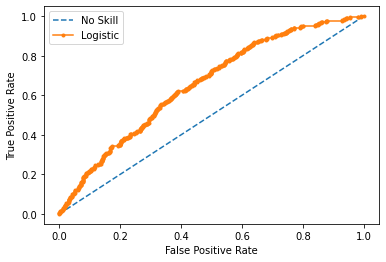

In [41]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test_split))]
# predict probabilities
lr_probs = logReg_L1.predict_proba(X_test_split)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_split, ns_probs)
lr_auc = roc_auc_score(y_test_split, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_split, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_split, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

From the ROC curve we conclude that our model performs better than majority class selection (no-skill) and thus has utility to it.

#### Non-Parametric model

We will implement powerful tree-based non-parametric models.
The drawback is that these models are less interpretable than say Linear models.

As a concession however, we can calculate feature importances using scores/metrics like information gain etc. as the scikit-learn library provides us directly with.

<ins> Loss metric chosen : cross-entropy </ins>

<ins> Evaluation scores: Accuracy, Recall, Precision, F1-Score </ins>

###### Steps which we will perform in the next cells:

A. Perform cross validation on the training data using XG-Boost to assess performance on metrics like accuracy, precision, recall and F1-score. 

B. Fit the final model on the training data and print the coefficients.

C. Calculate the probabilities of each class and plot the ROC curve against majority class selection. 

##### A. Cross-validation on XGBoost

In [42]:
# Cross validation for XG-Boost
 
import xgboost as xgb
# Let us perform 10-fold cross validation to compare with other models
import warnings; warnings.simplefilter('ignore') # avoid warning messages
# evaluate an lasso regression model on the dataset
from sklearn import utils
# define model
# all parameters not specified are set to their defaults
start = time()

weights = utils.compute_sample_weight('balanced', y_train_split) # For balancing the class
# Here there is only a slight improvement in F1-score

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42) 
# cross-entropy loss of logistic regression is also chosen here

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


# kfold = model_selection.KFold(n_splits=10, random_state=42)
# model=RandomForestClassifier(n_estimators=50) 

skfold = StratifiedKFold(n_splits=5)
model_skfold = LogisticRegression()
#results_skfold = model_selection.cross_val_score(logReg_L1, x_train, y_train, cv=skfold)

# Direct modeling instead of Hyper-parameter grid Search as logistic regression doesn't have critical parameters to tune
results_skfold = model_selection.cross_validate(estimator=xgb_model, #  not fitting on accuracy
                                          X=x_train,
                                          y=y_train,
                                          cv=skfold, scoring=scoring)

print("This took %0.3fs" % (time() - start))
#print(results_skfold)
print(f"Accuracy: {np.mean(results_skfold['test_accuracy'])}")
print(f"Precision: {np.mean(results_skfold['test_precision'])}")
print(f"Recall: {np.mean(results_skfold['test_recall'])}")
print(f"F1_score: {np.mean(results_skfold['test_f1_score'])}")


[17:24:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:24:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

The above results summarize the performance of XGBoost on our training dataset. 

##### B. Fitting the final model:

In [43]:
# Let us implement XG-Boost
from sklearn import utils

weights = utils.compute_sample_weight('balanced', y_train_split) # For balancing the class
# Here there is only a slight improvement in F1-score

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_split, y_train_split,sample_weight = weights)

y_pred_xgb = xgb_model.predict(X_test_split)

print(confusion_matrix(y_test_split, y_pred_xgb))
print(classification_report(y_test_split, y_pred_xgb))

[17:24:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[944 167]
 [171 230]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1111
           1       0.58      0.57      0.58       401

    accuracy                           0.78      1512
   macro avg       0.71      0.71      0.71      1512
weighted avg       0.78      0.78      0.78      1512



We cannot print weights for XGBoost as it is not parametric.

 ##### C. Predict the probabilities of the class prediction and plot the ROC curve.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.806


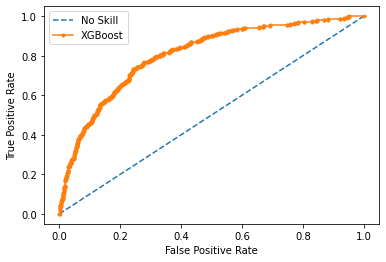

In [48]:

# generate a no skill prediction (majority class)
#ns_probs = [0 for _ in range(len(y_test_split))]
# predict probabilities
xgb_probs = xgb_model.predict_proba(X_test_split)
# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_split, ns_probs)
xgb_auc = roc_auc_score(y_test_split, xgb_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (xgb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_split, ns_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test_split, xgb_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

From the ROC curve we conclude that our model performs better than majority class selection (no-skill) and thus has utility to it.

#### Comparision of results between Logistic Regression and XGBoost

XGBoost outperforms (possibility of overfit) the logistic regression model as we have higher metrics except for recall which is higher for the logistic regression model.

#### Note on improving performance


If we are building our model for a specific purpose (capturing all insurance claims (more recall) , avoiding false triggers (more precision) etc.) then we should perform a grid search to optimise the hyperparameters for that particular task. 

This will improve the performance for our desired task.

### Manual feature selection based on performance result (Wrapper method)

Here we select features based on the final result of the model. When features are selected, the remaining colomns are dropped while modelling with data.

This can be implemented in many ways - RFE(Recursive feature elimination), Stepwise feature selection, Best k-features etc.


### Manual feature selection based on metric result (Filter method)

Similar to the previous section, features here are selected based on metrics like information gain or correlation.

This can be implemented in many ways - RFE(Recursive feature elimination), Stepwise feature selection, Best k-features etc.


### Dimensionality Reduction for Feature extraction then modeling

As the aim of this exercise is not score but rather clarity and interpretability, we have given the least priority to feature space extraction techniques like Principal Component Analysis, T-SNE etc.

These may be performed now to possibly obtain a better classification result at the expense of interpretability.

### Improving the modeling

We can continue with our modeling process in the following ways:

1. Choose way to impute missing values rather than eliminating them.
2. Perform a wrapper method model selection.
3. Perform a Filter method model selection.
4. Perform Dimensionality reduction and then experiment with various models in the reduced dimension feature space.

## Results on the test set

Let us apply our two models to the test set and generate the output in the desired format.

### Extract the test data and clean it

#### Read the data to a dataframe

In [50]:
x_train.columns  # Check training colomns order - very important that the test matches this

Index(['KIDSDRIV',      'AGE', 'HOMEKIDS',      'YOJ', 'TRAVTIME',      'TIF',
       'CLM_FREQ',  'MVR_PTS',  'CAR_AGE',   'INCOME', 'HOME_VAL', 'BLUEBOOK',
       'OLDCLAIM',          0,          1,          2,          3,          4,
                5,          6,          7,          8,          9,         10,
               11,         12,         13,         14,         15,         16,
               17,         18,         19,         20,         21,         22,
               23,         24,         25,         26,         27,         28,
               29,         30,         31,         32],
      dtype='object')

In [51]:
# We need to perform a couple of steps to process the data and make it ready for our machine learning model
# Follow the same processing steps which we followed for our training data

# First read from csv to dataframe
df_test = pd.read_csv("test_auto.csv")
df_test.head()


,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


#### Drop the target columns which are empty

In [52]:
# Drop the null value colomns

df_test = df_test.drop(['TARGET_FLAG','TARGET_AMT'],axis=1)

#### Index stored seperately 

In [53]:
# Index colomn stored in seperate df and dropped from df_test

index = pd.DataFrame(df_test['INDEX'])
df_test = df_test.drop(['INDEX'],axis=1)

index.head()


,INDEX
0,3
1,9
2,10
3,18
4,21


Verify the dataframe now.

In [54]:
df_test.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,1,40.0,1,11.0,"$50,815",Yes,$0,z_No,M,z_High School,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,0,44.0,2,12.0,"$43,486",Yes,$0,z_No,z_F,z_High School,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,0,35.0,2,NaN,"$21,204",Yes,$0,z_No,M,z_High School,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,0,59.0,0,12.0,"$87,460",No,$0,z_No,M,z_High School,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban


Looks good to go.

#### Removing the dollar symbol in the anomalous colomns

In [55]:
df_test[['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM']] = df_test[['INCOME','HOME_VAL','BLUEBOOK',
                                                                'OLDCLAIM']].replace('[\$,]',
                                                                                     '', regex=True).astype(float)
df_test.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,48.0,0,11.0,52881.0,No,0.0,z_No,M,Bachelors,...,21970.0,1,Van,yes,0.0,0,No,2,10.0,Highly Urban/ Urban
1,1,40.0,1,11.0,50815.0,Yes,0.0,z_No,M,z_High School,...,18930.0,6,Minivan,no,3295.0,1,No,2,1.0,Highly Urban/ Urban
2,0,44.0,2,12.0,43486.0,Yes,0.0,z_No,z_F,z_High School,...,5900.0,10,z_SUV,no,0.0,0,No,0,10.0,z_Highly Rural/ Rural
3,0,35.0,2,NaN,21204.0,Yes,0.0,z_No,M,z_High School,...,9230.0,6,Pickup,no,0.0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,0,59.0,0,12.0,87460.0,No,0.0,z_No,M,z_High School,...,15420.0,1,Minivan,yes,44857.0,2,No,4,1.0,Highly Urban/ Urban


#### Arrange all the categorical colomns and numerical colomns together

In [56]:
nums = ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'TRAVTIME', 'TIF', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE', 
        'INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']
# Arrange all the categorical colomns and numerical colomns together
df_test = pd.concat((df_test[cats], df_test[nums]), axis=1)

#### Remove all the empty rows 

In [57]:
# We have to remove the empty rows 

# check for `nans` in each column
df_test.isna().sum()

PARENT1         0
MSTATUS         0
SEX             0
EDUCATION       0
JOB           139
CAR_USE         0
CAR_TYPE        0
RED_CAR         0
REVOKED         0
URBANICITY      0
KIDSDRIV        0
AGE             1
HOMEKIDS        0
YOJ            94
TRAVTIME        0
TIF             0
CLM_FREQ        0
MVR_PTS         0
CAR_AGE       129
INCOME        125
HOME_VAL      111
BLUEBOOK        0
OLDCLAIM        0
dtype: int64

In [58]:
df_test.shape

(2141, 23)

In [59]:
print("The percentage of rows with missing values is: ", 100*len(df_test[df_test.isnull().any(axis=1)])/len(df_test))

The percentage of rows with missing values is:  24.708080336291452


In [60]:
# now remove all nan rows 
df_test = df_test[~df_test.isnull().any(axis=1)]
df_test.reset_index(inplace=True)
df_test.drop('index', inplace=True, axis=1)
df_test.shape

(1612, 23)

In [61]:
# check for `nans` in each column
df_test.isna().sum()

PARENT1       0
MSTATUS       0
SEX           0
EDUCATION     0
JOB           0
CAR_USE       0
CAR_TYPE      0
RED_CAR       0
REVOKED       0
URBANICITY    0
KIDSDRIV      0
AGE           0
HOMEKIDS      0
YOJ           0
TRAVTIME      0
TIF           0
CLM_FREQ      0
MVR_PTS       0
CAR_AGE       0
INCOME        0
HOME_VAL      0
BLUEBOOK      0
OLDCLAIM      0
dtype: int64

#### Remove duplicate rows if any

In [62]:
# find total duplicate entries and drop them if any
print(f'total duplicate rows: {df_test.duplicated().sum()}')

# drop duplicate rows if any
df_test = df_test[~df_test.duplicated()]
df_test.shape

total duplicate rows: 0


(1612, 23)

### Encoding the categorical variables

#### Perform one-hot encoding

In [63]:
# Let us encode the categorical variables of the dataframe

x_test_cat = df_test[cats]
print(x_test_cat.shape)

x_test_cat_one_hot_matrix =  enc.transform(x_test_cat).toarray()
print(x_test_cat_one_hot_matrix.shape)

x_test_cat_one_hot = pd.DataFrame(data=x_test_cat_one_hot_matrix)

print(type(x_test_cat_one_hot ))
x_test_cat_one_hot.head()

(1612, 10)
(1612, 33)
<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [64]:
df_test.shape

(1612, 23)

In [65]:
# changing the test df
df_test = pd.concat([df_test, x_test_cat_one_hot], axis=1).drop(cats, axis=1)

df_test.shape

(1612, 46)

In [66]:
df_test.head() # Now we have our test data in the same format as our training data

,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,INCOME,...,23,24,25,26,27,28,29,30,31,32
0,0,48.0,0,11.0,26,1,0,2,10.0,52881.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1,40.0,1,11.0,21,6,1,2,1.0,50815.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0,44.0,2,12.0,30,10,0,0,10.0,43486.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0,59.0,0,12.0,45,1,2,4,1.0,87460.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0,60.0,0,12.0,16,1,0,0,1.0,37940.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


#### Verify column order match for the prepared training and test data

In [67]:
print("The columns for Train data are: ")
print(list(df_test.columns))
print()
print("The columns for Test data are: ")
print(list(x_train.columns))


The columns for Train data are: 
['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'TRAVTIME', 'TIF', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE', 'INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]

The columns for Test data are: 
['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'TRAVTIME', 'TIF', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE', 'INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


The column orders match and our test dataframe is ready to be fed to our Machine learning models for generating predictions.

### Logistic regression predictions on the processed test data

#### Prediction of class output

In [68]:
# Prediction from the L1-LogReg model
y_pred_logreg_test = logReg_L1.predict(df_test)
print(type(y_pred_logreg_test))
print(y_pred_logreg_test)

<class 'numpy.ndarray'>
[1 1 1 ... 0 0 0]


In [69]:
# writing the results along with the index to a new file

#  Convert to df and put a column name - PREDICTED-TARGET
#LR-test = pd.dataframe(y_pred_logreg_test,columns=['PREDICTED'])

LR_test = pd.DataFrame(data=y_pred_logreg_test, columns=['PREDICTED_TARGET'])
print(LR_test.shape)
LR_test.head()

(1612, 1)


,PREDICTED_TARGET
0,1
1,1
2,1
3,1
4,0


In [70]:
# Append index and write to a new csv file

LR = pd.concat([index, LR_test], axis=1)
print(LR.shape)
LR.head()

(2141, 2)


,INDEX,PREDICTED_TARGET
0,3,1.0
1,9,1.0
2,10,1.0
3,18,1.0
4,21,0.0


##### Note:
We are appending all the indexes hence for some rows we will have no predicted target (NAN). At this stage we are not removing them so that there is visibility and these NAN rows can be treated seperately.

In [90]:
# Write to csv
LR.to_csv('Logistic_Regression_test-classifications.csv', index=False)

The final predictions of the Logistic regression model are thus stored per index in 'Logistic_Regression_test-results.csv'. 

#### Prediction of probabilities assosciated for each class prediction

In [73]:
# Optionally print probabilites of each classification
y_pred_logregprob_test = logReg_L1.predict_proba(df_test)
print(type(y_pred_logregprob_test))
print(y_pred_logregprob_test)

# The probabilities of class segregation are printed for each class and for each row of our test data. 

<class 'numpy.ndarray'>
[[0.46534582 0.53465418]
 [0.43860559 0.56139441]
 [0.49583315 0.50416685]
 ...
 [0.55843403 0.44156597]
 [0.71128152 0.28871848]
 [0.58378221 0.41621779]]


The class probabilites printed could give us an idea on the confidence with which our model estimates the class of the corresponding element(row) of our test data.

Let us write this also to a file.


In [75]:
LRprob_test = pd.DataFrame(data=y_pred_logregprob_test, columns=['NO CLAIM PROBABILITY','CLAIM PROBABILITY'])
print(LRprob_test.shape)
LRprob_test.head()

(1612, 2)


,NO CLAIM PROBABILITY,CLAIM PROBABILITY
0,0.465346,0.534654
1,0.438606,0.561394
2,0.495833,0.504167
3,0.136578,0.863422
4,0.595603,0.404397


In [76]:
LR_prob = pd.concat([index, LRprob_test], axis=1)
print(LR_prob.shape)
LR_prob.head()

(2141, 3)


,INDEX,NO CLAIM PROBABILITY,CLAIM PROBABILITY
0,3,0.465346,0.534654
1,9,0.438606,0.561394
2,10,0.495833,0.504167
3,18,0.136578,0.863422
4,21,0.595603,0.404397


In [77]:
# Write to csv
LR_prob.to_csv('Logistic_Regression_test-probabilities.csv', index=False)

### XG-Boost predictions on the processed test data

#### Prediction of class output

In [79]:
y_pred_xgb_test = xgb_model.predict(df_test)
print(type(y_pred_xgb_test))
print(y_pred_xgb_test)

<class 'numpy.ndarray'>
[0 0 0 ... 0 0 0]


In [80]:
# writing the results along with the index to a new file

#  Convert to df and put a column name - PREDICTED-TARGET
#LR-test = pd.dataframe(y_pred_logreg_test,columns=['PREDICTED'])

XGB_test = pd.DataFrame(data=y_pred_xgb_test, columns=['PREDICTED_TARGET'])
print(XGB_test.shape)
XGB_test.head()

(1612, 1)


,PREDICTED_TARGET
0,0
1,0
2,0
3,0
4,1


In [81]:
# Append index and write to a new csv file

XGB = pd.concat([index, XGB_test], axis=1)
print(XGB.shape)
XGB.head()

(2141, 2)


,INDEX,PREDICTED_TARGET
0,3,0.0
1,9,0.0
2,10,0.0
3,18,0.0
4,21,1.0


In [89]:
# Write to csv
XGB.to_csv('XGBoost_test-classifications.csv', index=False)

The final predictions of the XGBoost model are thus stored per index in 'XGBoost_test-results.csv

#### Prediction of probabilities assosciated for each class prediction

In [85]:
# Optionally print probabilites of each classification
y_predprob_xgb_test = xgb_model.predict_proba(df_test)
print(type(y_predprob_xgb_test))
print(y_predprob_xgb_test)

<class 'numpy.ndarray'>
[[0.7352992  0.26470074]
 [0.83806    0.16193995]
 [0.990505   0.00949502]
 ...
 [0.9731888  0.0268112 ]
 [0.9945667  0.00543332]
 [0.6298718  0.3701282 ]]


The class probabilites printed could give us an idea on the confidence with which our model estimates the class of the corresponding element(row) of our test data.

Let us write this also to a file.


In [86]:
XGBprob_test = pd.DataFrame(data=y_predprob_xgb_test, columns=['NO CLAIM PROBABILITY','CLAIM PROBABILITY'])
print(XGBprob_test.shape)
XGBprob_test.head()

(1612, 2)


,NO CLAIM PROBABILITY,CLAIM PROBABILITY
0,0.735299,0.264701
1,0.838060,0.161940
2,0.990505,0.009495
3,0.955476,0.044524
4,0.405882,0.594118


In [87]:
XGB_prob = pd.concat([index, XGBprob_test], axis=1)
print(XGB_prob.shape)
XGB_prob.head()

(2141, 3)


,INDEX,NO CLAIM PROBABILITY,CLAIM PROBABILITY
0,3,0.735299,0.264701
1,9,0.838060,0.161940
2,10,0.990505,0.009495
3,18,0.955476,0.044524
4,21,0.405882,0.594118


In [88]:
# Write to csv
XGB_prob.to_csv('XGBoost_test-probabilities.csv', index=False)

### Note on the results of the modeling process: 

Although our XGboost model performed better on the cross-validation it does not mean that it will generalise well for new unseen test data (the test data should follow a similar distribution as the training).

We could have a case of overfitting and the bias(structure) assumed by logistic regression could indeed be the right one leading to better results.

For our submission we would choose the XGBoost model.

At this moment however, we are unable to verify the results as we do not have the ground truth for the test dataset.


## Possible improvements (Next steps)

1. We can package certain sections of our code to make it reusable, cleaner and save time.
This includes functions of cleaning the data and in certain cases also plotting distributions.

2. Based on the EDA analysis we can choose features with the filter method manually and construct models.
Automatically features may also be chosen employing a Recursive feature elimination or selection.

3. Direct feature subset selection based on results (wrapper method).

4. Grid search can be performed to further optimize performance with respect to the metric of our choice. This is sometimes crucial depending on the business use case of our models.

5. All the imports of libraries can be shifted to the beginning of the notebooks. I have left the imports in the cells where they are used just to give an idea where each package have been used.

6. For a better performance, we can try normalising the numerical variables to bring them to a common scale (0,1).

7. Depending on what we intend to do next, the Exploratory data analysis can be extended and we can deduce more conclusions.